# Explanation
In this question, you will be implementing several Random Number Generators (RNGs) and testing their effectiveness through a series of statistical tests.

## Theory Question:
What is a **Pseudorandom Number Generator(PRNG)**? Compare it to **RNGs**. PRNGs are algorithms to create random numbers which are not truly random, but they have some properties of them. They usually relay on a variable called "seed" which is the starting point of random number generation. With seed, everyone will have the same sequence of random numbers.

On the other hand RNGs are true random number generators. For example the site [random.org](https://random.org) states that their random source is atmospheric noise. Overally, our computer cannot create truly random numbers and they are deterministic.

## Imports

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

# (P)Random-Number Generator Implementation

## Linear Congruential Generator (LCG):
LCG is a type of RNG that produces a sequence of random numbers based on a linear function. To implement LCG, you will need to follow these steps:

*   Set a seed value.
*   Choose appropriate values for the multiplier (a), increment (c), and modulus (m).
*   Apply the LCG formula to generate a sequence of random numbers.

In [39]:
def lcg(seed: int, a: int, c: int, m: int, n: int):
  numbers = np.zeros(n)
  numbers[0] = seed % m
  for i in range(1, n):
    numbers[i] = (a * numbers[i - 1] + c) % m
  return numbers

## Combined LCG:

Combined LCG is an improved version of LCG that combines the outputs of two or more LCGs to produce a better sequence of random numbers. To implement CLCG, you will need to follow this algorithm:

*   Initialize two or more LCGs with different seed values.
*   Generate random numbers using each LCG.
*   Combine the random numbers using a mathematical function.
    
    
    

In [40]:
def combined_lcg(seed1: int, seed2: int, a1: int, c1: int, m1: int, a2: int, c2: int, m2: int, n: int):
    lcg1 = lcg(seed1, a1, c1, m1, n)
    lcg2 = lcg(seed2, a2, c2, m2, n)
    return (lcg1 - lcg2) % (m1 - 1)

## Truncated LCG:
Truncated LCG is another variation of LCG that generates better random numbers by truncating the least significant bits of each iteration. To implement Truncated LCG, you will need to:

*   Initialize LCG with an appropriate seed value.
*   Choose appropriate values for the multiplier (a), increment (c), and modulus (m).
*   Set a lower bound and an upper bound for the number of bits to be stored in each iteration.
*   Apply the Truncated LCG formula to generate a sequence of random numbers.






In [53]:
def tlcg(seed: int, a: int, c: int, m: int, n: int, l=5, h=20):
    
    # Initialize variables
    x = seed % m  # current value of the generator
    result = []   # list to store generated numbers
    
    # Generate pseudo-random numbers using TLCG algorithm
    for i in range(n):
        x = (a * x + c) % m  # generate next number
        
        # Truncate bits and store only bits between l and h
        bits = (int(2**h-2**l) & x) >> l
        
        # Normalize the truncated number and append to result list
        result.append(bits / (2**(h-l)))
        
    return np.array(result)

## Python Random:
Python has a built-in random function that uses the **Mersenne Twister** algorithm to generate random numbers. You can simply use this function to generate a sequence of random numbers.

In [42]:
import random

def random_array(n: int):
    return np.array([random.random() for _ in range(n)])

In [56]:
n = 10000
seed1, seed2 = 123, 456
a1, c1, m1 = 16807, 0, 2**31 - 1
a2, c2, m2 = 48271, 0, 2**31 - 1
p = 1000

lcg_numbers = lcg(seed1, a1, c1, m1, n) / m1
truncated_lcg_numbers = tlcg(seed1, a1, c1, m1, n)
combined_lcg_numbers = combined_lcg(seed1, seed2, a1, c1, m1, a2, c2, m2, n) / m1
python_random_numbers = random_array(n)

# Test Methods Implementation
After implementing the RNGs, you need to test their effectiveness through a series of statistical tests:

## Kolmogorov-Smirnov test:
This test checks whether the distribution of the generated random numbers follows a particular distribution.

In [44]:
def ks_test(numbers):
    #Hint: You may use: stats.kstest()
    return stats.kstest(numbers, stats.uniform.cdf)

## Chi-Square test: 
This test checks whether the distribution of the generated random numbers is statistically independent.

In [45]:
def chi_square_test(numbers, num_bins):
    freq, _, _ = plt.hist(numbers, bins=num_bins)
    plt.clf()
    expected_freq = np.full(num_bins, len(numbers) / num_bins)
    return stats.chisquare(freq, expected_freq)

## Auto-correlation test:
This test checks whether there is a correlation between generated numbers and their lagged versions.

In [46]:
def autocorrelation_test(numbers, lag):
    x = numbers[:-lag]
    y = numbers[lag:]
    return np.corrcoef(x, y)[0, 1]

You can introduce another test, such as the Runs test, to test for randomness and implement it.

In [47]:
num_bins = 100
lag = 1

# Show Results

In [58]:
def print_results(title, ks, chi, auto):
    print(f"{title}:")
    print(f"  Kolmogorov-Smirnov test: p-value = {ks.pvalue:.6f}")
    print(f"  Chi-square test: p-value = {chi.pvalue:.6f}")
    print(f"  Autocorrelation test: {auto:.6f}")
    print()

print_results("LCG", ks_test(lcg_numbers), chi_square_test(lcg_numbers, num_bins), autocorrelation_test(lcg_numbers, lag))
print_results("Truncated LCG", ks_test(truncated_lcg_numbers), chi_square_test(truncated_lcg_numbers, num_bins), autocorrelation_test(truncated_lcg_numbers, lag))
print_results("Combined LCG", ks_test(combined_lcg_numbers), chi_square_test(combined_lcg_numbers, num_bins), autocorrelation_test(combined_lcg_numbers, lag))
print_results("Python Random", ks_test(python_random_numbers), chi_square_test(python_random_numbers, num_bins), autocorrelation_test(python_random_numbers, lag))

LCG:
  Kolmogorov-Smirnov test: p-value = 0.159037
  Chi-square test: p-value = 0.383123
  Autocorrelation test: 0.006946

Truncated LCG:
  Kolmogorov-Smirnov test: p-value = 0.880156
  Chi-square test: p-value = 0.815808
  Autocorrelation test: -0.002832

Combined LCG:
  Kolmogorov-Smirnov test: p-value = 0.407960
  Chi-square test: p-value = 0.493576
  Autocorrelation test: -0.003450

Python Random:
  Kolmogorov-Smirnov test: p-value = 0.622368
  Chi-square test: p-value = 0.296902
  Autocorrelation test: 0.023632



<Figure size 640x480 with 0 Axes>

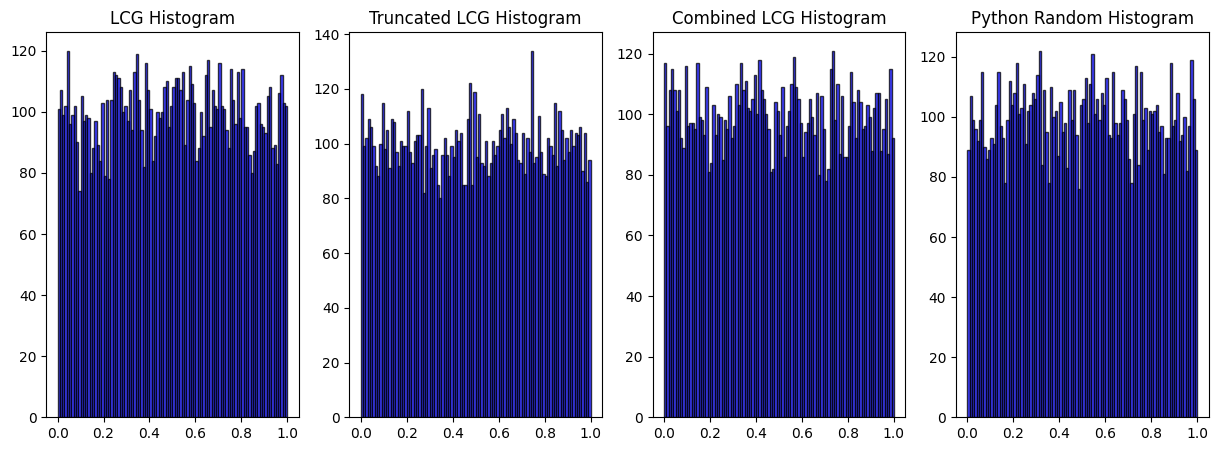

In [57]:
plt.figure(figsize=(15, 5))

plt.subplot(141)
plt.hist(lcg_numbers, bins=num_bins, alpha=0.75, color='blue', edgecolor='black')
plt.title("LCG Histogram")

plt.subplot(142)
plt.hist(truncated_lcg_numbers, bins=num_bins, alpha=0.75, color='blue', edgecolor='black')
plt.title("Truncated LCG Histogram")

plt.subplot(143)
plt.hist(combined_lcg_numbers, bins=num_bins, alpha=0.75, color='blue', edgecolor='black')
plt.title("Combined LCG Histogram")

plt.subplot(144)
plt.hist(python_random_numbers, bins=num_bins, alpha=0.75, color='blue', edgecolor='black')
plt.title("Python Random Histogram")

plt.show()